In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

# Regressão Logística

## Classificação binária

In [2]:
from sklearn import datasets
iris = datasets.load_iris()

In [3]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [4]:
print(list(iris.keys()))

['data', 'target', 'target_names', 'DESCR', 'feature_names']


In [5]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [6]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


**Atividade (para fazer agora):** Construa um classificador por regressão logística para separar as flores do tipo 'Iris Virginica' das demais usando as características 'petal length (cm)' e 'petal width (cm)'. Como resultado final, apresente:

- Acurácia do classificador no conjunto de testes.
- Curva ROC e respectiva área.
- Um diagrama ilustrando a probabilidade da classe positiva. 
    - Dica: veja https://matplotlib.org/gallery/images_contours_and_fields/contour_demo.html

Use seu arsenal de ferramentas de validação para encontrar o melhor modelo.

In [10]:
x = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

x = x[['petal length (cm)', 'petal width (cm)']]
y = (y == 2)

In [11]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state=RANDOM_SEED, test_size=.33)

In [12]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

clf.fit(xtrain, ytrain)
ypred = clf.predict(xtest)

In [14]:
from sklearn.metrics import accuracy_score

print(sum(ytest == ypred) / ytest.size)
print(accuracy_score(ytest, ypred))

0.96
0.96


In [17]:
yscores = clf.predict_proba(xtest)
print(yscores)
yscores = yscores[:, 1]

[[0.69844759 0.30155241]
 [0.94791652 0.05208348]
 [0.1678897  0.8321103 ]
 [0.55414133 0.44585867]
 [0.6016495  0.3983505 ]
 [0.93709178 0.06290822]
 [0.66554499 0.33445501]
 [0.18188109 0.81811891]
 [0.55414133 0.44585867]
 [0.70744949 0.29255051]
 [0.29517569 0.70482431]
 [0.96576825 0.03423175]
 [0.95827631 0.04172369]
 [0.96558964 0.03441036]
 [0.94844608 0.05155392]
 [0.49888685 0.50111315]
 [0.20911209 0.79088791]
 [0.74915696 0.25084304]
 [0.65466354 0.34533646]
 [0.21090022 0.78909978]
 [0.95762509 0.04237491]
 [0.39235704 0.60764296]
 [0.93677334 0.06322666]
 [0.24816642 0.75183358]
 [0.28081233 0.71918767]
 [0.18108057 0.81891943]
 [0.38085592 0.61914408]
 [0.17555369 0.82444631]
 [0.94870895 0.05129105]
 [0.95762509 0.04237491]
 [0.95891795 0.04108205]
 [0.93709178 0.06290822]
 [0.60680434 0.39319566]
 [0.95762509 0.04237491]
 [0.95827631 0.04172369]
 [0.342112   0.657888  ]
 [0.55414133 0.44585867]
 [0.95784323 0.04215677]
 [0.95806031 0.04193969]
 [0.96558964 0.03441036]


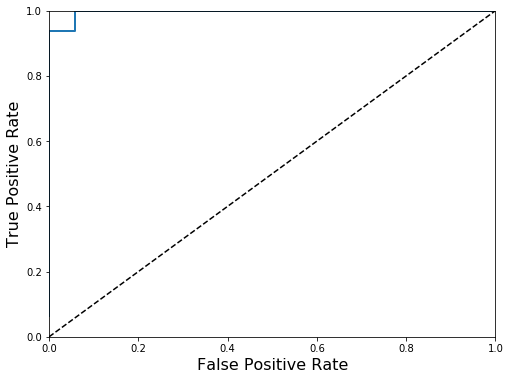

In [19]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(ytest, yscores)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.show()

In [ ]:
u = np.arange(1, 7, .01)
v = np.arange(1, 3, .01)
U, V = np.meshgrid(u, v)

X_test_plot = np.c_[U.reshape(U.size, 1), V.reshape(V.size, 1)]
y_test_plot = clf.predict_proba(X_test_plot)
y_test_plot = y.test_plot[:,1].reshape(U.shape)

plt.figure()
cs = plt.contour(U, V, y_test_plot)
plt.clabel('False positive')

xpostest = xtest[ytest]
xnegtest = xtest[~ytest]



**Atividade (para casa):** Repita a atividade anterior usando todas as quatro características originais. Qual o aumento de desempenho?


## Classificação multiclasse

**Atividade (para fazer agora):** Repita a atividade de classificação do dataset 'Iris' usando apenas as características 'petal length (cm)' e 'petal width (cm)'. Como resultado final, apresente:

- Acurácia do classificador no conjunto de testes.
- Diagramas ilustrando a probabilidade para cada classe
    - Dica: veja https://matplotlib.org/gallery/images_contours_and_fields/contour_demo.html

Use seu arsenal de ferramentas de validação para encontrar o melhor modelo.

**Atividade (para casa):** Repita a atividade anterior usando todas as quatro características originais. Qual o aumento de desempenho?

# Support Vector Machines

(com material adaptado do livro texto)

In [ ]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)


def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

plt.figure(figsize=(8,6))
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import LinearSVC

polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=0.001, loss="hinge", random_state=42))
    ])

polynomial_svm_clf.fit(X, y)

plt.figure(figsize=(8,6))
plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from pprint import pprint

grid = GridSearchCV(polynomial_svm_clf, {'svm_clf__C' : [10**k for k in range(-6, 6)]})
grid.fit(X, y)

print(grid.best_params_)
pprint(grid.best_estimator_.get_params())

plt.figure(figsize=(8,6))
plot_predictions(grid, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

**Atividade: (para fazer agora)** Teste corretamente o desempenho dos classificadores abaixo no dataset anterior (moons)

- LinearSVC
- SVC, com kernel:
    - polinomial
    - RBF
   
Apresente os seguintes resultados:

- Acurácia
- Curva ROC
- parâmetros ótimos